In [2]:
import librosa
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


2024-03-27 16:46:42.866413: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-27 16:46:42.868695: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 16:46:42.906879: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 16:46:42.906918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 16:46:42.906948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
classes = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']
def fe(file):
    n=128
    a,s=librosa.load(file)
    m= librosa.feature.mfcc(y=a, sr=s, n_mfcc=n)
    mfc_mean=np.mean(m.T,axis=0)
    mfc_mean=mfc_mean.reshape(1,n)
    
    mody=load_model('./Ann0.h5')
    p=mody.predict(mfc_mean)[0]
    return(p)

In [7]:
probabilities=fe("./pneumonia.wav")
probabilities*=100  
print(probabilities)
for class_name, percentage in zip(classes, probabilities):
    print(f'{class_name}: {percentage:.2f}%')

2024-03-27 16:48:13.038861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1/1 [==============================] - 0s 127ms/step
[1.1288915e-18 1.0495682e-19 1.0000000e+02 2.1565676e-18 8.3139739e-08
 6.8297296e-18]
Bronchiectasis: 0.00%
Bronchiolitis: 0.00%
COPD: 100.00%
Healthy: 0.00%
Pneumonia: 0.00%
URTI: 0.00%


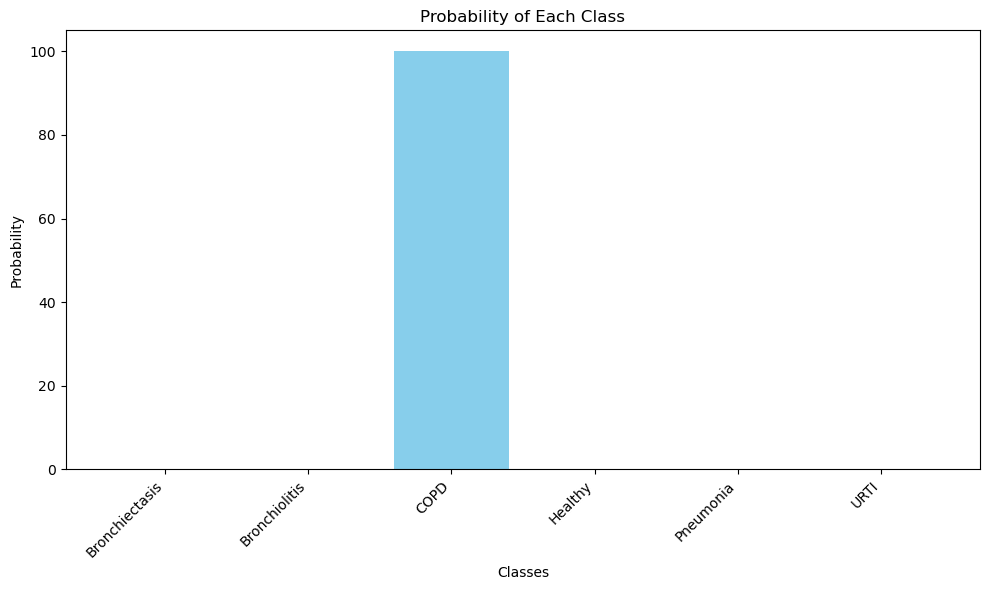

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(classes, probabilities, color='skyblue')
plt.title('Probability of Each Class')
plt.xlabel('Classes')
plt.ylabel('Probability')
                                  ##saving the graph
patient_id=''
patient_id_image = f"./{patient_id}dis_graph"
plt.savefig(patient_id_image)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show plot
plt.tight_layout()
plt.show()